In [1]:
# 8.3 使用投票法集成非監督式學習的基學習器

AttributeError: 'KMeans' object has no attribute '_n_threads'

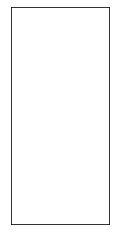

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

np.random.seed(123456)

dat = []

t = 0.5

for i in range(10):

#    dat.append(np.random.uniform(size=2))
    c = np.random.randint(3)
    a = np.random.uniform() * 2 * 3.14
    r = t * np.sqrt(np.random.uniform())

    x = r * np.cos(a)
    y = r * np.sin(a)


    dat.append([c/2+x, c/2+y])


clusterers = []
for _ in range(3):
    km = KMeans(n_clusters=3)
    noise = np.random.uniform(low=-0.5, high=0.5, size=(3,2))
    km.cluster_centers_ = np.array([[0, 0], [0.5, 0.5], [1, 1]]) + noise
    clusterers.append(km)



plt.figure()
for i, clusterer in enumerate(clusterers):

    plt.subplot(1, 3, i+1)
    plt.xticks([])
    plt.yticks([])
    c = clusterer.predict(dat)
    print(c)
    plt.scatter(*zip(*dat), c=c)
    c = clusterer.predict(clusterer.cluster_centers_)
    plt.scatter(*zip(*clusterer.cluster_centers_), c='w', marker='*', s=240, edgecolors='r')
    plt.title('Clustering: %d'%i)


plt.figure()
dat = np.array(dat)
plt.xticks([])
plt.yticks([])
c = np.array([0, 0, 1, 1, 1, 0, 0, 0, 0, 1])
plt.scatter(*zip(*dat[c == 0]), c='C0', label='Cluster 0')
plt.scatter(*zip(*dat[c == 1]), c='C1', label='Cluster 1')
plt.legend()
plt.title('Voting Clustering')
plt.show()